<a href="https://colab.research.google.com/github/cleysonl/ML_Bootcamp_CLL/blob/master/Model_training_prototypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Load Dependencies**

In [27]:
!pip install tensorflow-gpu==2.0.0.alpha0

In [0]:
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import cv2
import json
import requests
from tqdm import tqdm

%matplotlib inline

## **Building & Deploying an Apparel Classifier**

### **Load Dataset**

In [29]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('\nTrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('Test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))


Train_images.shape: (60000, 28, 28), of uint8
Test_images.shape: (10000, 28, 28), of uint8


## **Training a simple CNN model from Scratch**

### **Reshaping Image Data for Modeling**

In [30]:
#reshape for feeding into the model
train_images_gr = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images_gr = test_images.reshape(test_images.shape[0], 28, 28, 1)

print('\nTrain_images.shape: {}, of {}'.format(train_images_gr.shape, train_images_gr.dtype))
print('\nTest_images.shape: {}, of {}'.format(test_images_gr.shape, test_images_gr.dtype))


Train_images.shape: (60000, 28, 28, 1), of uint8

Test_images.shape: (10000, 28, 28, 1), of uint8


### **Visualize sample images**

['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal']


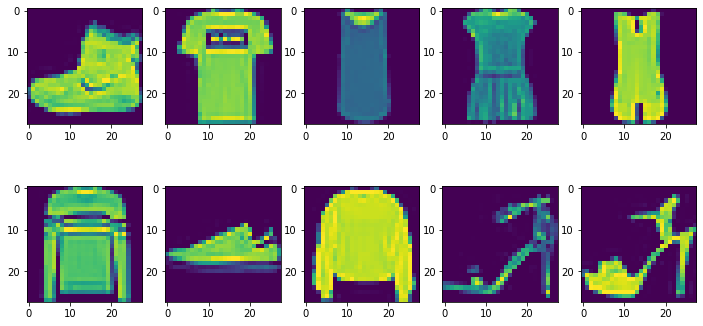

In [31]:
fig, ax = plt.subplots(2, 5, figsize=(12, 6))
ax[0, 0].imshow(train_images_gr[0].reshape(28, 28))
ax[0, 1].imshow(train_images_gr[1].reshape(28, 28))
ax[0, 2].imshow(train_images_gr[2].reshape(28, 28))
ax[0, 3].imshow(train_images_gr[3].reshape(28, 28))
ax[0, 4].imshow(train_images_gr[4].reshape(28, 28))
ax[1, 0].imshow(train_images_gr[5].reshape(28, 28))
ax[1, 1].imshow(train_images_gr[6].reshape(28, 28))
ax[1, 2].imshow(train_images_gr[7].reshape(28, 28))
ax[1, 3].imshow(train_images_gr[8].reshape(28, 28))
ax[1, 4].imshow(train_images_gr[9].reshape(28, 28))

print([class_names[i] for i in train_labels[:10]])

### **Build CNN Model Architecture**

In [0]:
INPUT_SHAPE = (28, 28, 1)

def create_cnn_architecture_model1(input_shape):
  inp = keras.layers.Input(shape = input_shape)

  conv1 = keras.layers.Conv2D(filters=16, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding='same')(inp)
  pool1 = keras.layers.MaxPooling2D(pool_size = (2,2))(conv1)
  conv2 = keras.layers.Conv2D(filters=32, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding='same')(pool1)
  pool2 = keras.layers.MaxPooling2D(pool_size =(2, 2))(conv2)

  flat = keras.layers.Flatten()(pool2)

  hidden1 = keras.layers.Dense(256, activation='relu')(flat)
  drop1 = keras.layers.Dropout(rate=0.3)(hidden1)

  out = keras.layers.Dense(10, activation = 'softmax')(drop1)

  model = keras.Model(inputs=inp, outputs=out)
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

In [33]:
model = create_cnn_architecture_model1(input_shape=INPUT_SHAPE)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               4016

### **Model Training**

In [34]:
EPOCHS = 10
train_images_scaled = train_images_gr / 255.
model.fit(train_images_scaled, train_labels, validation_split=0.1, epochs=EPOCHS)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 8s 140us/sample - loss: 0.4582 - accuracy: 0.8333 - val_loss: 0.3339 - val_accuracy: 0.8773
Epoch 2/10
54000/54000 [==============================] - 7s 138us/sample - loss: 0.3082 - accuracy: 0.8880 - val_loss: 0.2759 - val_accuracy: 0.8975
Epoch 3/10
54000/54000 [==============================] - 7s 134us/sample - loss: 0.2643 - accuracy: 0.9027 - val_loss: 0.2587 - val_accuracy: 0.9027
Epoch 4/10
54000/54000 [==============================] - 8s 139us/sample - loss: 0.2346 - accuracy: 0.9129 - val_loss: 0.2483 - val_accuracy: 0.9087
Epoch 5/10
54000/54000 [==============================] - 7s 135us/sample - loss: 0.2116 - accuracy: 0.9216 - val_loss: 0.2394 - val_accuracy: 0.9137
Epoch 6/10
54000/54000 [==============================] - 8s 142us/sample - loss: 0.1892 - accuracy: 0.9287 - val_loss: 0.2404 - val_accuracy: 0.9132
Epoch 7/10
54000/54000 [===========================

### **Save Model Weights**

In [0]:
import os

if not os.path.isdir('model_weights/'):
  os.mkdir('model_weights/')

model.save_weights(filepath= 'model_weights/cnn_model1_wt.h5', overwrite=True)

### **Build Model Architecture and Load Model Weights**

In [0]:
model = create_cnn_architecture_model1(input_shape=INPUT_SHAPE)
model.load_weights('model_weights/cnn_model1_wt.h5')

### **Evaluate Model Performance on Test Data**

In [37]:
test_images_scaled = test_images_gr / 255.
predictions = model.predict(test_images_scaled)
predictions[:5]

array([[8.91746677e-09, 1.35540759e-10, 4.29188421e-11, 1.10093167e-11,
        2.38737207e-11, 2.30706561e-07, 2.09750731e-10, 3.25475085e-05,
        2.46321324e-10, 9.99967217e-01],
       [8.45491450e-05, 1.06394644e-15, 9.99633908e-01, 4.37942083e-09,
        2.69504264e-04, 1.23420441e-11, 1.19919841e-05, 1.20488233e-12,
        4.17839235e-10, 1.70722838e-13],
       [1.59540773e-14, 1.00000000e+00, 3.32995187e-21, 3.48099175e-17,
        1.67730175e-20, 4.90836312e-26, 1.89485787e-17, 5.05495522e-30,
        2.01704745e-20, 6.29935622e-28],
       [4.26310158e-15, 1.00000000e+00, 1.34694811e-20, 1.18525626e-17,
        4.30946339e-19, 4.07023199e-26, 7.57136871e-19, 7.02375789e-31,
        1.68948664e-24, 1.24775986e-26],
       [1.51950233e-02, 1.40396126e-12, 2.94838357e-03, 8.26478299e-07,
        8.77792074e-04, 7.56561747e-09, 9.80978012e-01, 1.23232700e-11,
        2.59819721e-09, 1.39045024e-08]], dtype=float32)

In [38]:
prediction_labels = np.argmax(predictions, axis=1)
prediction_labels[:5]

array([9, 2, 1, 1, 6])

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(classification_report(test_labels, prediction_labels, target_names = class_names))
pd.DataFrame(confusion_matrix(test_labels, prediction_labels), index=class_names, columns = class_names)

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.86      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.86      0.87      1000
       Dress       0.90      0.94      0.92      1000
        Coat       0.87      0.84      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.74      0.76      0.75      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,859,0,11,11,0,1,113,0,5,0
Trouser,1,984,0,10,2,0,2,0,1,0
Pullover,20,1,861,7,56,0,54,0,1,0
Dress,19,6,7,936,6,0,24,0,2,0
Coat,1,0,47,48,838,0,66,0,0,0
Sandal,1,0,0,0,0,985,0,11,0,3
Shirt,91,2,57,27,54,0,762,0,7,0
Sneaker,0,0,0,0,0,13,0,973,0,14
Bag,3,0,0,5,2,3,1,1,985,0
Ankle boot,0,0,0,0,0,6,1,38,0,955


## **Fine-tuning a pre-trained ResNet-50 CNN Model***

### **Build CNN Model Architecture**

In [0]:
INPUT_SHAPE_RN = (32, 32, 3)

def create_cnn_architecture_model2(input_shape):
  inc_net = keras.applications.resnet50.ResNet50(include_top=False, weights = 'imagenet', input_shape = input_shape)
  inc_net.trainable = True
  # Fine-tune the layers
  for layer in inc_net.layers:
    layer.trainable = True

  base_inc = inc_net
  base_out = base_inc.output
  pool_out = keras.layers.Flatten()(base_out)

  hidden1 = keras.layers.Dense(units = 512, activation = 'relu')(pool_out)
  drop1 = keras.layers.Dropout(rate = 0.3)(hidden1)
  hidden2 = keras.layers.Dense(units = 512, activation = 'relu')(drop1)
  drop2 = keras.layers.Dropout(rate = 0.3)(hidden2) 

  out = keras.layers.Dense(units = 10, activation = 'softmax')(drop2)

  model = keras.Model(inputs = base_inc.input, outputs = out)
  model.compile(optimizer = keras.optimizers.RMSprop(lr= 1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  return model

In [41]:
model2 = create_cnn_architecture_model2(input_shape = INPUT_SHAPE_RN)
model2.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 16, 16, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

### **Reshaping Image Data for Modeling**

In [42]:
train_images_3ch = np.stack([train_images]*3, axis=-1)
test_images_3ch = np.stack([test_images]*3, axis=-1)

print('\nTrain_images.shape: {}, of {}'.format(train_images_3ch.shape, train_images_3ch.dtype))
print('Test_images.shape: {}, of {}'.format(test_images_3ch.shape, test_images_3ch.dtype))


Train_images.shape: (60000, 28, 28, 3), of uint8
Test_images.shape: (10000, 28, 28, 3), of uint8


### **Resizing Image data for Modeling**

In [0]:
import cv2

def resize_image_array(img, img_size_dims):
  img = cv2.resize(img, dsize = img_size_dims, interpolation = cv2.INTER_CUBIC)
  img = np.array(img, dtype = np.float32)
  return img

In [44]:
%%time

IMG_DIMS = (32, 32)

train_images_3ch = np.array([resize_image_array(img, img_size_dims = IMG_DIMS) for img in train_images_3ch])
test_images_3ch = np.array([resize_image_array(img, img_size_dims = IMG_DIMS) for img in test_images_3ch])

print('\nTrain_images.shape: {}, of {}'.format(train_images_3ch.shape, train_images_3ch.dtype))
print('\nTest_images.shape: {}, of {}'.format(test_images_3ch.shape, test_images_3ch.dtype))


Train_images.shape: (60000, 32, 32, 3), of float32

Test_images.shape: (10000, 32, 32, 3), of float32
CPU times: user 1.5 s, sys: 1.02 s, total: 2.51 s
Wall time: 2.52 s


### **Model Training**

In [45]:
EPOCHS = 10
train_images_3ch_scaled = train_images_3ch / 255.
model2.fit(train_images_3ch_scaled, train_labels, validation_split=0.1, epochs=EPOCHS)

54000/54000 [==============================] - 94s 2ms/sample - loss: 0.1911 - accuracy: 0.9448 - val_loss: 0.2108 - val_accuracy: 0.9308
Epoch 9/10
54000/54000 [==============================] - 94s 2ms/sample - loss: 0.1822 - accuracy: 0.9496 - val_loss: 0.2639 - val_accuracy: 0.9228
Epoch 10/10
54000/54000 [==============================] - 92s 2ms/sample - loss: 0.1766 - accuracy: 0.9516 - val_loss: 0.2407 - val_accuracy: 0.9317


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 98s 2ms/sample - loss: 0.5330 - accuracy: 0.8326 - val_loss: 0.3190 - val_accuracy: 0.8903
Epoch 2/10
54000/54000 [==============================] - 92s 2ms/sample - loss: 0.3126 - accuracy: 0.9030 - val_loss: 0.2259 - val_accuracy: 0.9150
Epoch 3/10
54000/54000 [==============================] - 93s 2ms/sample - loss: 0.2669 - accuracy: 0.9174 - val_loss: 0.2647 - val_accuracy: 0.9098
Epoch 4/10
54000/54000 [==============================] - 93s 2ms/sample - loss: 0.2513 - accuracy: 0.9245 - val_loss: 0.8622 - val_accuracy: 0.9153
Epoch 5/10
54000/54000 [==============================] - 94s 2ms/sample - loss: 0.2250 - accuracy: 0.9321 - val_loss: 0.2986 - val_accuracy: 0.9288
Epoch 6/10
54000/54000 [==============================] - 94s 2ms/sample - loss: 0.2125 - accuracy: 0.9395 - val_loss: 0.9022 - val_accuracy: 0.9193
Epoch 7/10
54000/54000 [==============================] -

### **Save Model Weights**

In [0]:
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
    
model2.save_weights(filepath='model_weights/cnn_model2_wt.h5', overwrite=True)

### **Build Model Architecture and Load Model Weights**

In [47]:
model2 = create_cnn_architecture_model2(input_shape=INPUT_SHAPE_RN)
model2.load_weights('model_weights/cnn_model2_wt.h5')

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


### **Evaluate Model Performance on Test Data**

In [48]:
test_images_3ch_scaled = test_images_3ch / 255.
predictions = model2.predict(test_images_3ch_scaled)
predictions[:5]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [7.8687008e-11, 3.3985192e-21, 1.0000000e+00, 7.2764182e-14,
        2.5757187e-08, 3.0713535e-18, 1.5384455e-08, 1.4293117e-15,
        1.2702022e-18, 5.5458073e-17],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.5385592e-26, 1.0000000e+00, 9.4518479e-26, 7.2889256e-20,
        3.7026412e-25, 5.0788608e-24, 3.7440191e-23, 1.1049606e-26,
        3.1358357e-28, 4.7111525e-26],
       [1.5910782e-02, 5.0578819e-07, 1.9732801e-02, 8.9156022e-04,
        6.8991743e-03, 1.0542024e-06, 9.5654339e-01, 4.8753864e-06,
        1.0937049e-05, 4.8968918e-06]], dtype=float32)

array([[5.9326377e-13, 8.6979439e-21, 3.1472894e-15, 2.5944047e-16,
        4.0900993e-15, 2.3679689e-10, 9.4139523e-12, 6.8893757e-09,
        3.2460310e-15, 1.0000000e+00],
       [4.2245586e-07, 1.6587563e-14, 9.9988973e-01, 2.3692506e-08,
        1.7318271e-05, 2.0079704e-12, 9.2499802e-05, 3.3788243e-11,
        2.3289877e-13, 3.5486091e-12],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5533209e-38,
        0.0000000e+00, 4.8725277e-33, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0236222e-12, 3.5296588e-35, 2.2434757e-13, 1.1600507e-16,
        8.1422535e-11, 1.3847573e-27, 1.0000000e+00, 4.6568545e-25,
        3.6471047e-23, 3.5894327e-26]], dtype=float32)

In [49]:
prediction_labels = np.argmax(predictions, axis=1)
prediction_labels[:5]

array([9, 2, 1, 1, 6])

array([9, 2, 1, 1, 6])

In [50]:
print(classification_report(test_labels, prediction_labels, target_names=class_names))
pd.DataFrame(confusion_matrix(test_labels, prediction_labels), index=class_names, columns=class_names)

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.89      0.88      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.87      0.91      0.89      1000
       Dress       0.90      0.94      0.92      1000
        Coat       0.84      0.92      0.88      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.83      0.69      0.75      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,887,0,20,20,3,0,63,1,6,0
Trouser,0,978,0,14,4,0,3,0,1,0
Pullover,10,0,906,12,45,0,27,0,0,0
Dress,8,2,8,937,18,0,27,0,0,0
Coat,1,0,36,29,917,0,17,0,0,0
Sandal,0,0,0,0,0,978,0,12,1,9
Shirt,112,0,65,29,103,0,689,0,2,0
Sneaker,0,0,0,0,0,5,0,977,0,18
Bag,2,1,1,3,3,3,0,1,985,1
Ankle boot,0,0,0,0,0,3,0,27,1,969


              precision    recall  f1-score   support

 T-shirt/top       0.89      0.86      0.87      1000
     Trouser       0.91      0.99      0.95      1000
    Pullover       0.94      0.80      0.86      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.81      0.93      0.86      1000
      Sandal       0.86      0.99      0.92      1000
       Shirt       0.75      0.77      0.76      1000
     Sneaker       0.96      0.89      0.93      1000
         Bag       0.99      0.87      0.92      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,856,0,14,31,4,0,93,0,2,0
Trouser,0,989,0,9,0,0,0,0,2,0
Pullover,9,1,798,5,92,0,95,0,0,0
Dress,5,2,7,927,34,0,24,0,1,0
Coat,0,0,12,19,933,0,35,0,1,0
Sandal,0,1,0,0,0,993,0,5,0,1
Shirt,87,1,19,30,94,0,765,0,4,0
Sneaker,0,84,0,0,0,11,0,892,0,13
Bag,1,7,1,3,2,114,1,1,869,1
Ankle boot,0,0,0,0,0,31,1,28,0,940


## **Tensorflow Serving**

### **Saving models for Tensorflow Serving**

In [53]:
model1 = create_cnn_architecture_model1(input_shape=INPUT_SHAPE)
model1.load_weights('./model_weights/cnn_model1_wt.h5')
export_path = './tf_saved_models/1'

# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors
# And stored with the default serving key
tf.saved_model.save(model1,export_path)

INFO:tensorflow:Assets written to: ./tf_saved_models/1/assets


In [54]:
model2 = create_cnn_architecture_model2(input_shape=INPUT_SHAPE_RN)
model2.load_weights('./model_weights/cnn_model2_wt.h5')
export_path = './tf_saved_models/2'

tf.saved_model.save(model2, export_path)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


INFO:tensorflow:Assets written to: ./tf_saved_models/2/assets


In [55]:
! tree --du -h .

/bin/bash: tree: command not found
